In [1]:
!pip install tensorflow

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, Dense, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [3]:
#Reading Data
train_data = pd.read_csv(r'C:\Users\Piem2001\Documents\NLP\nlp-getting-started\train.csv')
test_data = pd.read_csv(r'C:\Users\Piem2001\Documents\NLP\nlp-getting-started\test.csv')

In [4]:
train_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [13]:
##Example of tweets
for i in range(5):
    print('Tweet no.',i+1,':',train_data.iloc[i,3])

Tweet no. 1 : Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
Tweet no. 2 : Forest fire near La Ronge Sask. Canada
Tweet no. 3 : All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
Tweet no. 4 : 13,000 people receive #wildfires evacuation orders in California 
Tweet no. 5 : Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


In [14]:
from sklearn.model_selection import train_test_split
VAL_ratio = 0.2

X = train_data["text"]
y = train_data["target"]

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=VAL_ratio, random_state=42)

X_test = test_data["text"]

In [15]:
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>') 
tokenizer.fit_on_texts(X_train) #Train Data
sequences = tokenizer.texts_to_sequences(X_train)
padded_sequences = pad_sequences(sequences, maxlen=50, padding='post', truncating='post')

In [16]:
sequences_val = tokenizer.texts_to_sequences(X_val) #X_val
padded_sequences_val = pad_sequences(sequences_val, maxlen=50, padding='post', truncating='post')

In [17]:
tokenizer

In [18]:
sequences

[[1,
  11,
  3965,
  2442,
  9,
  171,
  8,
  409,
  229,
  127,
  7,
  2095,
  3966,
  1171,
  257,
  3967,
  3968,
  24,
  2,
  3,
  1],
 [1, 1, 1, 616, 6, 1499, 49, 18, 2443, 3969, 2444, 410, 7, 199, 1],
 [617,
  3050,
  8,
  1,
  3970,
  9,
  1,
  1827,
  8,
  86,
  1500,
  20,
  5,
  411,
  9,
  464,
  1828,
  915,
  52,
  30,
  112,
  24,
  2,
  3,
  1],
 [2096,
  57,
  64,
  5,
  1172,
  412,
  980,
  3971,
  15,
  1501,
  266,
  438,
  19,
  1,
  134,
  1644,
  4,
  2,
  3,
  1],
 [2097, 492, 556, 30, 493, 439, 2098, 1, 1],
 [299,
  686,
  687,
  33,
  23,
  172,
  267,
  188,
  390,
  11,
  5,
  145,
  9,
  173,
  69,
  85,
  4,
  2,
  3,
  1],
 [134,
  1,
  12,
  745,
  6,
  3051,
  76,
  218,
  42,
  3972,
  16,
  268,
  8,
  3052,
  1,
  174,
  22,
  1502,
  17,
  16,
  1],
 [1,
  652,
  1,
  202,
  1829,
  13,
  3973,
  2445,
  916,
  784,
  124,
  210,
  586,
  188,
  1036,
  4,
  2,
  3,
  1],
 [2446, 1263, 524, 587, 102, 26, 78, 1093, 7, 5, 688, 4, 2, 3, 1],
 [1,
  224,

In [19]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=50),  # Embedding layer
    Bidirectional(LSTM(64, return_sequences=True)),  # Bidirectional LSTM layer with return sequences
    Dropout(0.5),  # Dropout layer for regularization
    Bidirectional(LSTM(64)),  # Bidirectional LSTM layer
    Dense(64, activation='relu'),  # Dense hidden layer
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

In [20]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [21]:
history = model.fit(padded_sequences, y_train, epochs=20, validation_data=(padded_sequences_val, y_val), verbose=2)

Epoch 1/20
191/191 - 20s - loss: 0.5233 - accuracy: 0.7391 - val_loss: 0.4491 - val_accuracy: 0.7965 - 20s/epoch - 105ms/step
Epoch 2/20
191/191 - 10s - loss: 0.3466 - accuracy: 0.8563 - val_loss: 0.4427 - val_accuracy: 0.8089 - 10s/epoch - 53ms/step
Epoch 3/20
191/191 - 11s - loss: 0.2556 - accuracy: 0.9031 - val_loss: 0.5566 - val_accuracy: 0.7702 - 11s/epoch - 56ms/step
Epoch 4/20
191/191 - 10s - loss: 0.1889 - accuracy: 0.9327 - val_loss: 0.6376 - val_accuracy: 0.7498 - 10s/epoch - 55ms/step
Epoch 5/20
191/191 - 12s - loss: 0.1322 - accuracy: 0.9507 - val_loss: 0.8357 - val_accuracy: 0.7656 - 12s/epoch - 60ms/step
Epoch 6/20
191/191 - 12s - loss: 0.0991 - accuracy: 0.9575 - val_loss: 0.8961 - val_accuracy: 0.7689 - 12s/epoch - 63ms/step
Epoch 7/20
191/191 - 11s - loss: 0.0847 - accuracy: 0.9639 - val_loss: 0.9937 - val_accuracy: 0.7452 - 11s/epoch - 56ms/step
Epoch 8/20
191/191 - 11s - loss: 0.0668 - accuracy: 0.9681 - val_loss: 1.2394 - val_accuracy: 0.7518 - 11s/epoch - 58ms/step

In [22]:
loss = history.history['loss']
accuracy = history.history['accuracy']

validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']

C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\3110368466.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, loss, 'b', label='Training Loss', color='blue')
C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\3110368466.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, validation_loss, 'b', label='Validation Loss', color='green')


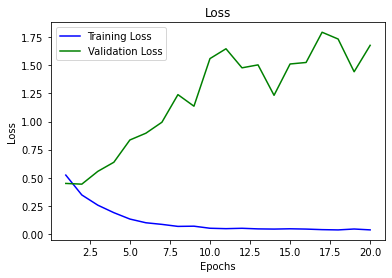

In [23]:
##Plot loss
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training Loss', color='blue')
plt.plot(epochs, validation_loss, 'b', label='Validation Loss', color='green')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\462647601.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'b', label='Training Accuracy', color='blue')
C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\462647601.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy', color='green')


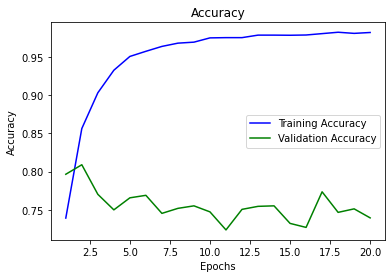

In [24]:
##Plot Accuracy
plt.plot(epochs, accuracy, 'b', label='Training Accuracy', color='blue')
plt.plot(epochs, validation_accuracy, 'b', label='Validation Accuracy', color='green')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [25]:
Pred_text = tokenizer.texts_to_sequences(X_val)
padded_new_sequences = pad_sequences(Pred_text, maxlen=50, padding='post', truncating='post')
Test_text = tf.convert_to_tensor(padded_new_sequences)
prediction = model.predict(Test_text)

48/48 [==============================] - 3s 21ms/step


In [26]:
print(prediction)
print(prediction[1][0])

[[2.2322178e-05]
 [1.8444052e-05]
 [9.9203718e-01]
 ...
 [9.9524933e-01]
 [9.9999577e-01]
 [9.9998164e-01]]
1.8444052e-05


In [27]:
pred = []
for i, text in enumerate(X_val):
    predict = prediction[i][0]
    pred.append(1 if predict > 0.5 else 0)

In [28]:
evaluation = model.evaluate(padded_new_sequences, y_val)
print(evaluation)

48/48 [==============================] - 1s 24ms/step - loss: 1.6782 - accuracy: 0.7393
[1.6781718730926514, 0.7393302917480469]


In [29]:
print('total:',len(pred),'wrong classified:', sum(abs(pred- y_val)), 'accuracy:', (len(pred)-sum(abs(pred- y_val)))/len(pred))

total: 1523 wrong classified: 397 accuracy: 0.7393302692055155


#Second Encoding

In [30]:
!pip install transformers

In [31]:
from transformers import BertTokenizer, TFBertForSequenceClassification, BertConfig

In [32]:
model_bert = "bert-base-uncased"  # There are other Bert models
tokenizer = BertTokenizer.from_pretrained(model_bert)
model_B = TFBertForSequenceClassification.from_pretrained(model_bert)

All PyTorch model weights were used when initializing TFBertForSequenceClassification.

Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [33]:
X_train = list(X_train)
X_val = list(X_val)

In [34]:
tokenized_texts_train = tokenizer(X_train, padding=True, truncation=True, return_tensors="tf")
tokenized_texts_val = tokenizer(X_val, padding=True, truncation=True, return_tensors="tf")

In [35]:
input_ids_train = tokenized_texts_train["input_ids"]
attention_mask_train = tokenized_texts_train["attention_mask"]

input_ids_val = tokenized_texts_val["input_ids"]
attention_mask_val = tokenized_texts_val["attention_mask"]

In [36]:
train_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": input_ids_train, "attention_mask": attention_mask_train}, y_train)).batch(200)
test_dataset = tf.data.Dataset.from_tensor_slices(({"input_ids": input_ids_val, "attention_mask": attention_mask_val}, y_val)).batch(200)


In [37]:
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model_B.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [38]:
history_B = model_B.fit(train_dataset, epochs=4, validation_data= test_dataset)

Epoch 1/4
31/31 [==============================] - 3502s 112s/step - loss: 0.5139 - accuracy: 0.7598 - val_loss: 0.4143 - val_accuracy: 0.8306
Epoch 2/4
31/31 [==============================] - 3387s 110s/step - loss: 0.3833 - accuracy: 0.8406 - val_loss: 0.4034 - val_accuracy: 0.8267
Epoch 3/4
31/31 [==============================] - 3540s 115s/step - loss: 0.3428 - accuracy: 0.8622 - val_loss: 0.5171 - val_accuracy: 0.7879
Epoch 4/4
31/31 [==============================] - 3647s 118s/step - loss: 0.2962 - accuracy: 0.8844 - val_loss: 0.4498 - val_accuracy: 0.8273


In [39]:
test_loss, test_accuracy = model_B.evaluate(test_dataset)

8/8 [==============================] - 141s 17s/step - loss: 0.4498 - accuracy: 0.8273


In [40]:
training_loss_B = history_B.history['loss']
validation_loss_B = history_B.history['val_loss']

training_accuracy_B = history_B.history['accuracy']
validation_accuracy_B = history_B.history['val_accuracy']


C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\1025836535.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs_B, training_loss_B, 'b', label='Training Loss', color = 'red')
C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\1025836535.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs_B, validation_loss_B, 'b', label='Validation Loss', color = 'blue')


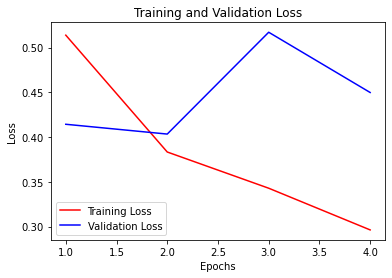

In [41]:
epochs_B = range(1, len(training_loss_B) + 1)
plt.plot(epochs_B, training_loss_B, 'b', label='Training Loss', color = 'red')
plt.plot(epochs_B, validation_loss_B, 'b', label='Validation Loss', color = 'blue')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\863747748.py:1: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs_B, training_accuracy_B, 'b', label='Training Loss', color = 'red')
C:\Users\Piem2001\AppData\Local\Temp\1\ipykernel_5984\863747748.py:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(epochs_B, validation_accuracy_B, 'b', label='Validation Loss', color = 'blue')


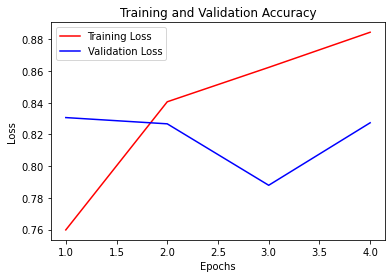

In [42]:
plt.plot(epochs_B, training_accuracy_B, 'b', label='Training Loss', color = 'red')
plt.plot(epochs_B, validation_accuracy_B, 'b', label='Validation Loss', color = 'blue')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [43]:
model_name = "NLP_tweet_BERT_model"

model_B.save_pretrained(model_name)